In [1]:
from stableemrifisher.fisher.derivatives import derivative
from stableemrifisher.fisher import StableEMRIFisher
from few.waveform import GenerateEMRIWaveform
import matplotlib.pyplot as plt
import os
import corner
from pathlib import Path
import cupy as xp
import numpy as np
use_gpu=True

startup


In [2]:
#set initial parameters
M = 5e5
mu = 14
a = 0.8
p0 = 11.58
e0 = 0.3
iota0 = 0.8 #equatorial
Y0 = np.cos(iota0)
Phi_phi0 = 2
Phi_theta0 = 3
Phi_r0 = 4

qS = 1.5
phiS = 0.7
qK = 1.2
phiK = 0.6
dist = 2.
mich = True #mich = True implies output in hI, hII long wavelength approximation
dt = 10.0
T = 0.9

inspiral_kwargs = {
        "DENSE_STEPPING": 0,
        "max_init_len": int(1e4),
        "err": 1e-10,  # To be set within the class
        "use_rk4": False,
        }

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": True,  # GPU is available for this type of summation
    "pad_output": True,
}

amplitude_kwargs = {
    }

waveform_model = GenerateEMRIWaveform('Pn5AAKWaveform', inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=use_gpu)

waveform = xp.asarray(waveform_model(M, mu, a, p0, e0, Y0, 
                          dist, qS, phiS, qK, phiK, 
                          Phi_phi0, Phi_theta0, Phi_r0, 
                          mich=mich, dt=dt, T=T)).get()


#varied parameters
param_names = ['M','mu','a','p0','e0','Y0','dist', 'qS','phiS','qK','phiK','Phi_phi0','Phi_theta0','Phi_r0']

fish = StableEMRIFisher(M, mu, a, p0, e0, Y0, dist, qS, phiS, qK, phiK,
              Phi_phi0, Phi_theta0, Phi_r0, dt=dt, T=T, EMRI_waveform_gen=waveform_model,
              param_names=param_names, stats_for_nerds=True, use_gpu=True,
              filename='', CovEllipse=True, live_dangerously=True, der_order=4, )



Body is not plunging, Fisher should be stable.


In [30]:
deriv_orders = [2, 4, 6, 8]
outderivs = []
for deriv in deriv_orders:
    outderivs.append(derivative(waveform_model, fish.wave_params, 'e0', 1e-6, order=deriv, use_gpu=True, waveform_kwargs=fish.waveform_kwargs)[0].get())

For parameter e0
e0 = 0.299999
For parameter e0
e0 = 0.30000099999999996
For parameter e0
e0 = 0.299999
For parameter e0
e0 = 0.29999800000000004
For parameter e0
e0 = 0.30000099999999996
For parameter e0
e0 = 0.30000199999999994
For parameter e0
e0 = 0.299999
For parameter e0
e0 = 0.29999800000000004
For parameter e0
e0 = 0.29999700000000007
For parameter e0
e0 = 0.30000099999999996
For parameter e0
e0 = 0.30000199999999994
For parameter e0
e0 = 0.3000029999999999
For parameter e0
e0 = 0.299999
For parameter e0
e0 = 0.29999800000000004
For parameter e0
e0 = 0.29999700000000007
For parameter e0
e0 = 0.2999960000000001
For parameter e0
e0 = 0.30000099999999996
For parameter e0
e0 = 0.30000199999999994
For parameter e0
e0 = 0.3000029999999999
For parameter e0
e0 = 0.3000039999999999


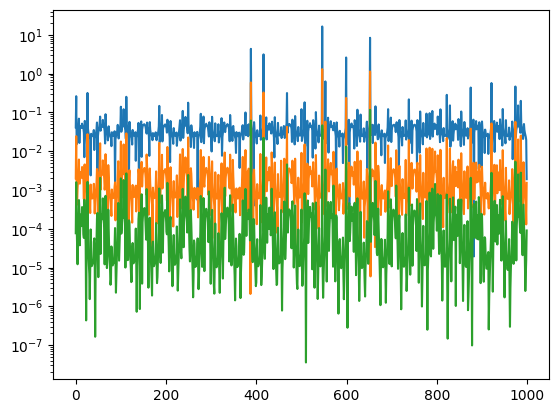

In [37]:
for i in range(3):
    plt.semilogy(abs(1 - outderivs[i][-1000:]/outderivs[-1][-1000:]))